## Вспомогательные функции

Достаточно просто выполнить ячейку ниже.

In [1]:
import numpy as np

def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

import numpy as np

def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A, W, b

def linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b

def L_model_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    parameters = {'W1': np.array([[ 1.62434536, -0.61175641, -0.52817175],
        [-1.07296862,  0.86540763, -2.3015387 ]]),
 'W2': np.array([[ 1.74481176, -0.7612069 ]]),
 'b1': np.array([[ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.]])}
    """
    np.random.seed(1)
    X = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return X, parameters

def compute_cost_test_case():
    Y = np.asarray([[1, 1, 1]])
    aL = np.array([[.8,.9,0.4]])
    
    return Y, aL

def linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache

def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)
    
    return dA, linear_activation_cache

def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ( (A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
 'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
 'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
 'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
 'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
 'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
 'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
 'db1': 0.75937676204411464,
 'db2': 0.86163759922811056,
 'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return parameters, grads

# Описание проекта

> Логика кода всего проекта является вложенной, поэтому при выполнении задания полезно иметь общее представление.

- 1.**Packages**：Импорты
- 2.**Outline of the Assignment**：Представление об общей структуре
- 3.**Initialization**
    - 1）**2-layer Neural Network**：Построение двухслойной нейронной сети (простой примером, который позже не будет использоваться).
    - 2）**L-layer Neural Network**：Построение многослойной сети с $L$ слоями<br>
        **initialize_parameters_deep(layer_dims) --> parameters** <br>(параметры — это словарь, содержащий вес и смещение каждого слоя. Например, параметры['W1'] могут получить вес первого слоя)
- 4.**Forward propagation module** Модуль прямого распространения. 
    - 1）**linear_forward(A, W, b) --> Z, cache** <br>(cache=(A, W, b))
    - 2）**linear_activation_forward(A_prev, W, b, activation) --> A** <br> cache=(linear_cache, activation_cache), где linear_cache=(A_pre, W, b),activation_cache=z
    - 3）**L_model_forward(X, parameters) -->  AL,caches** <br> (AL представляет собой вычисленное значение последнего слоя, в caches хранятся кеши $L$, упомянутые в (2) выше)
- 5.**Cost function** Расчет функции потерь
    - **compute_cost(AL, Y) --> cost**
- 6.**Backward propagation module** Модуль обратного распространения
    - 1）**linear_backward(dZ, cache) --> dA_prev, dW, db** <br>
Входное значение cache=(A, W, b)
    - 2）**linear_activation_backward(dA, cache, activation) --> dA_prev, dW, db** <br> cache=(linear_cache, activation_cache), где linear_cache=(A,W,b),activation_cache=z
    - 3）**L_model_backward(AL, Y, caches)-->grads** <br> grads это словарь, содержащий grads["dWl"],grads["dbl"],grads["dAl"], где l=1,2...L.
    - 4）**update_parameters(parameters, grads, learning_rate) --> parameters** <br> parameters представляет все обновленные веса, а веса первого слоя доступны по ключу ['W1'].

# Создание глубокой нейронной сети: шаг за шагом

Ранее мы обучали двухслойную нейронную сеть (с одним скрытым слоем). На этой неделе построим глубокую нейронную сеть, в которой может быть любое количество слоев.

- В этом ноутбуке требуется реализовать все функции, необходимые для построения глубокой нейронной сети.

**В этом задании научимся:**
- Использовать нелинейные функции активации, такие как ReLU, чтобы улучшить свою модель.
- Строить более глубокие нейронные сеть (с более чем одним скрытым слоем)

**Обозначения**:
- Верхний индекс $[l]$ обозначает величину, связанную с $l$-ым слоем.
     - Пример: $a^{[L]}$ — это активация $L$-ого слоя. $W^{[L]}$ и $b^{[L]}$ — параметры $L$-ого слоя.
- Надстрочный индекс $(i)$ обозначает величину, связанную с $i$-ым примером.
     - Пример: $x^{(i)}$ — это $i$-ый обучающий пример.
- Нижний индекс $i$ обозначает $i$-ый элемент вектора.
     - Пример: $a^{[l]}_i$ обозначает $i$-ую активацию $l$-ого слоя.


## 1 - Packages

Сначала импортируем пакеты, которые понадобятся во время этого задания.

In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # значения по умолчанию для графиков
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Outline of the Assignment

Чтобы построить свою нейронную сеть, необходимо реализовать несколько «вспомогательных функций». Эти вспомогательные функции будут использоваться в следующем задании для построения двухслойной нейросети и L-слойной нейросети.

Вот план этого задания, требуется:

- Инициализировать параметры для двухслойнои сети и для L-слойной сети.
- Реализовать прямое распространение (фиолетовый блок на рисунке ниже).
     - Дописать LINEAR-часть для прямого распространения (в результате рассчитывается $Z^{[l]}$).
     - Использовать уже реализованные функции активации (ACTIVATION function) - relu/sigmoid.
     - Объединить предыдущие два шага в отдельную функцию [LINEAR->ACTIVATION].
     - Применить новую функцию, используя функцию активации ReLU, L-1 раз (для слоев с 1 по L-1) и добавить применение этой функции с функцией активации сигмоида (для последнего уровня $L$). Это и будет функция прямого распространения в L-слойной сети - L_model_forward function.
- Рассчитать значение функции потерь.
- Реализовать обратное распространение (красный блок на рисунке ниже).
    - Дописать LINEAR-часть для обратного распространения.
    - Градиент функций активации уже реализован - relu_backward/sigmoid_backward. 
    - Объединить предыдущие два шага в отдельную функцию [LINEAR->ACTIVATION] для обратного распространения.
    - Применить новую функцию с использованием производной от ReLU L-1 раз и добавить применение этой функции с использованием производной от сигмоиды (для последнего уровня). Это и будет функция обратного распространения -  L_model_backward function
- Обновляем значения параметров.

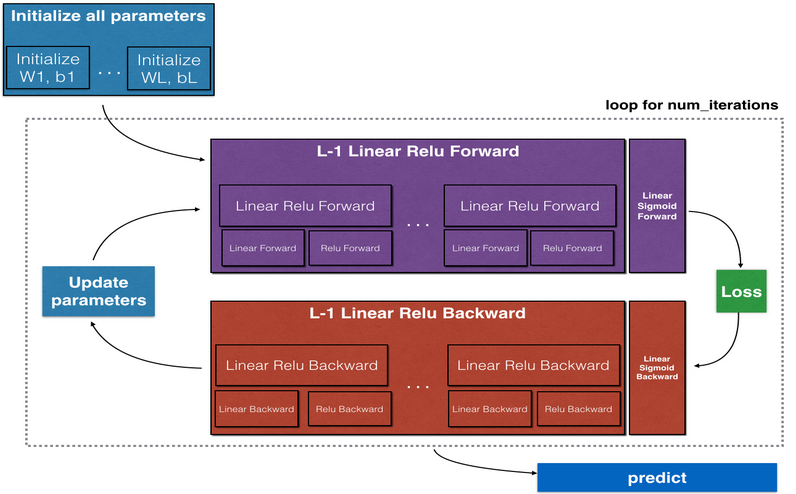
<caption><center><b> Рисунок 1 </b></center></caption><br>


**Заметьте** что каждой функции для прямого распространения соответствует обратная функция. Поэтому на каждом этапе прямого распространения необходимо будет сохранять некоторые значения в кеше. Кэшированные значения будут в дальнейшем использованы для вычисления градиентов. В этом задании рассмотрим, как именно выполнить каждый из этих шагов.

## 3 — Initialization

Требуется написать две вспомогательные функции, которые будут инициализировать параметры модели. Первая функция будет использоваться для инициализации параметров двухслойной модели. Вторая -  обобщит этот процесс для $L$ слоев.

### 3.1 — 2-слойная нейронная сеть

**Задание**. Создайте и инициализируйте параметры двухслойной нейронной сети.

**Инструкции**:
- Структура модели: *LINEAR -> RELU -> LINEAR -> SIGMOID*. 
- Для матрицы весов требуется использовать случайную инициализацию. Используйте `np.random.randn(shape)*0.01` правильной размерности.
- Используйте нулевую инициализацию для смещений. Используйте `np.zeros(shape)`.

In [8]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Аргументы:
    n_x -- размер входного слоя
    n_h -- размер скрытого слоя
    n_y -- размер выходного слоя
    
    Возвращает:
    параметры -- словарь, содержащий параметры:
                    W1 -- матриза весов размерностью (n_h, n_x)
                    b1 -- вектор смещения размерностью (n_h, 1)
                    W2 -- матрица весов размерностью (n_y, n_h)
                    b2 -- вектор смещения размерностью (n_y, 1)
    """
    
    np.random.seed(1)
    
    ### начало кода ### (≈ 4 строки)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### конец кода ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [12]:
parameters = initialize_parameters(2,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.00865408 -0.02301539]]
b2 = [[0.]]


**ожидаемый результат**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td> [[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]] </td> 
  </tr>

  <tr>
    <td> **b1**</td>
    <td>[[ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[ 0.00865408 -0.02301539]]</td>
  </tr>
  
  <tr>
    <td> **b2** </td>
    <td> [[ 0.]] </td> 
  </tr>
  
</table>

### 3.2 - L-слойная нейронная сеть

Инициализировать нейронную сеть из L-слоев сложнее, поскольку здесь гораздо больше весовых матриц и векторов смещения. При заполнении «initialize_parameters_deep» вы должны убедиться, что ваши размеры совпадают на всех слоях. Напомним, что $n^{[l]}$ — это количество единиц в слое $l$. Например, если размер входных данных $X$ равен $(12288, 209)$ (количество примеров $m=209$), то:

<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> **Shape of W** </td> 
        <td> **Shape of b**  </td> 
        <td> **Activation** </td>
        <td> **Shape of Activation** </td> 
    <tr>
    <tr>
        <td> **Layer 1** </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td> 
        <td> $(n^{[1]},209)$ </td> 
    <tr>
    <tr>
        <td> **Layer 2** </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>  
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>  
   <tr>
        <td> **Layer L-1** </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
   <tr>  
   <tr>
        <td> **Layer L** </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>

</table>

Помните, что когда мы вычисляем $W X + b$ в питоне, происходит бродкастинг вектора $b$. Например, если: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Тогда $WX + b$ будет:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Задание**: Реализуйте инициализацию для  L-слойной нейронной сети. 

**Инструкции**:
- Структура модели - *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. Т.е. у нее $L-1$ слоев используют функцию активации ReLU, а выходной слой имеет сегмоидную функцию активации.
- Для матрицы весов требуется использовать случайную инициализацию. Используйте `np.random.rand(shape) * 0.01`.
- Используйте нулевую инициализацию для смещений. Используйте `np.zeros(shape)`.
- Будем хранить $n^{[l]}$, количество нейронов в разных слоях, в переменной `layer_dims`. Например, `layer_dims` для «Модели классификации плоских данных» из прошлой лабораторной - [2,4,1]: там было два входа, один скрытый слой с четырьмя нейронами, и выходной слой с одним нейроном. Таким образом размер `W1` был (4,2), `b1` - (4,1), `W2` - (1,4) и `b2` - (1,1). Теперь требуется обобщить это на случай с $L$ слоями.
- Вот реализация для $L=1$ (однослойная нейронная сеть). Она должна помочь в понимании, как реализовать общий случай (нейронная сеть с L-слоями).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [15]:
def initialize_parameters_deep(layer_dims):
    """
    Аргументы:
    layer_dims -- массив (список), содержащий размерности для каждого слоя в нашей сети
    
    Возвращает:
    parameters -- словарь, содержащий параметры "W1", "b1", ..., "WL", "bL":
                    Wl -- матрица весов размерностью (layer_dims[l], layer_dims[l-1])
                    bl -- вектор смещения размерностью (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # кол-во слоев в сети

    for l in range(1, L):
        ### Начало кода ### (≈ 2 строчки)
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        ### Конец кода ###
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [16]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


**Ожидаемый результат**:
       
<table style="width:80%">
  <tr>
    <td> **W1** </td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  
  <tr>
    <td>**b1** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
  <tr>
    <td>**W2** </td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  
  <tr>
    <td>**b2** </td>
    <td>[[ 0.]
 [ 0.]
 [ 0.]]</td> 
  </tr>
  
</table>

## 4 - Forward propagation module

### 4.1 - Прямое распространение 
Теперь, когда параметры инициализированы, требуется реализовать прямое распространение. Начнем с реализации некоторых основных функций, которые будут использоваться позже при реализации модели. Реализуйте три функции в следующем порядке:

- LINEAR
- LINEAR -> ACTIVATION, где ACTIVATION будет или ReLU, или Sigmoid. 
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (вся модель)

В линейной части прямого распространения вычисляются следующие уравнения:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

где $A^{[0]} = X$. 

**Задание**: Реализуйте линейную часть прямого распространения

**Напоминание**:
Рекомендуется использовать `np.dot()`. Если размерности не совпадают, может помочь print(W.shape).

In [19]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Аргументы:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Возвращает:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = np.dot(W, A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [20]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


**Expected output**:

<table style="width:35%">
  
  <tr>
    <td> **Z** </td>
    <td> [[ 3.26295337 -1.23429987]] </td> 
  </tr>
  
</table>

### 4.2 - Linear-Activation Forward

В этом ноутбуке используются две функции активации:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. Сигмоида уже реализована во вспомогательных функциях - `sigmoid`. Эта функция возвращает **два** значения: активацию "`A`" и "`cache`", который содержит "`Z`" (в дальнейшем будет использоваться при обратном распространении). Для использования достаточно написать: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: Математическое описание этой функции - $A = RELU(Z) = max(0, Z)$. Функция, которая реализует это преобразование - `relu`. Эта функция возвращает **два** значения: активацию "`A`" и "`cache`", который содержит "`Z`" (в дальнейшем будет использоваться при обратном распространении). Для использования достаточно написать: 
``` python
A, activation_cache = relu(Z)
```

Для удобства использования объединим две функции (Linear and Activation) в одну функцию (LINEAR->ACTIVATION). Таким образом будет реализована функция, которая производит сразу линейное преобразование, а затем применяет функцию активации.

**Упражнение**: Реализуйте прямое распространение для слоя нейросети. Математически можно записать следующим образом: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$, где функция активации "g" может быть sigmoid() или relu(). Используйте linear_forward() и подходящую функцию активации.

In [23]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Реализует прямое распространение для слоя LINEAR->ACTIVATION.

    Аргументы:
    A_prev -- активации из предыдущего слоя (или входные данные): (размер предыдущего слоя, кол-во элементов)
    W -- матрица весов: массив размерностью (размер текущего слоя, размер предыдущего слоя)
    b -- свободный член, массив размерностью (размер текущего слоя, 1)
    activation -- функция активации, которая будет использоваться на этом слое, хранится в виде текстовой строки: "sigmoid" or "relu"

    Возвращает:
    A -- вывод функции активации, также называемый активацией 
    cache -- словарь, содержащий "linear_cache" и "activation_cache";
             хранимый для эффективного расчета обратного распространения
    """
    
    if activation == "sigmoid":

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":

        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [27]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("С сигмоидой: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("С ReLU: A = " + str(A))

С сигмоидой: A = [[0.96890023 0.11013289]]
С ReLU: A = [[3.43896131 0.        ]]


**Ожидаемый результат**:
       
<table style="width:35%">
  <tr>
        <td> **С сигмоидо: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **С ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>


**Замечание**: Вычисление «[LINEAR->ACTIVATION]» соответствует одному слою нейронной сети, а не двум.

### d) L-слойная модель

Для еще большего удобства при реализации $L$-слойной нейронной сети вам понадобится функция, которая повторяет предыдущую («linear_activation_forward» с RELU) $L-1$ раз, а затем следует «linear_activation_forward» с SIGMOID.

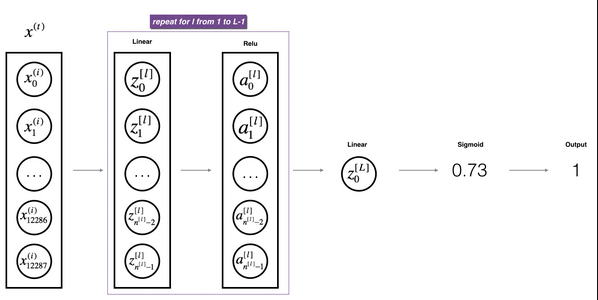
<caption><center><b> Рисунок 2 </b>: [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID model</center></caption><br>

**Задание**: Реализуйте прямое распространение для вышеуказанной модели.

**Инструкция**: В приведенном ниже коде переменная `AL` будет обозначать $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A ^{[L-1]} + b^{[L]})$. (Выходное значение модели.)


**Советы**:
- Используйте функции, которые вы написали ранее
- Используйте цикл for для репликации [LINEAR->RELU] (L-1) раз.
- Не забывайте следить за значениями cache в списке «cache». Чтобы добавить новое значение `c` в `list`, вы можете использовать `list.append(c)`.

In [30]:
def L_model_forward(X, parameters):
    """
   Реализуйте прямое распространение для вычисления [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Аргументы:
    X -- данные, массив размерностью (размер инпута, количество элементов)
    parameters -- вывод initialize_parameters_deep()
    
    Возвращает:
    AL -- последнее значение после активации
    caches -- список caches,  содержащий:
                каждый кеш Linear_relu_forward() (их L-1, проиндексированных от 0 до L-2)
                 кеш Linear_sigmoid_forward() (один, с индексом L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # количество слоев
    
    # реализация [LINEAR -> RELU]*(L-1). Добавьте "cache" в список "caches".
    for l in range(1, L):
        A_prev = A 
        ### Начало кода ### (≈ 2 строки)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation='relu')
        caches.append(cache)
    

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation='sigmoid')
    caches.append(cache)
    ### Конец кода ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [31]:
X, parameters = L_model_forward_test_case()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Длинна списка caches = " + str(len(caches)))

AL = [[0.17007265 0.2524272 ]]
Длинна списка caches = 2


<table style="width:40%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.17007265  0.2524272 ]]</td> 
  </tr>
  <tr>
    <td> **Длинна списка caches ** </td>
    <td > 2</td> 
  </tr>
</table>

Отлично! Теперь у вас есть реализованное прямое распространение, которое принимает входные данные X и выводит вектор-строку $A^{[L]}$ с выходами модели. Также  все промежуточные значения записаны в «кеши». Используя $A^{[L]}$, вы можете вычислить функцию стоимости для прогнозов модели.

## 5 - Cost function

Необходимо вычислить значение функции стоимости, потому что нужна проверка, действительно ли модель обучается.

**Задание**: Вычислите значение функции стоимости $J$, используя следующую формулу: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$


In [34]:
def compute_cost(AL, Y):
    """
    Реализуйте функцию стоимости, определенную уравнением (7).

    Аргументы:
    AL -- вектор вероятности, соответствующий предсказаниям label, размерностью (1, количество элементов)
    Y -- вектор правильных "label" (например: 0 если не кошка, 1 если кошка), размерностью (1, количество элементов)

    Возвращает:
    cost -- значение функции стоимости в случае использования cross-entropy loss
    """
    
    m = Y.shape[1]

    # Вычислите потери aL и y.
    ### Начало кода ### (≈ 1 строка)
    cost = -(np.dot(Y, np.log(AL).T) + np.dot(1 - Y, np.log(1 - AL).T)) / m
    ### Конец кода ###
    
    cost = np.squeeze(cost)      # Чтобы убедиться, что размернность вашей стоимости соответствует ожиданиям (например, [[17]] превращается в 17).
    assert(cost.shape == ())
    
    return cost

In [35]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615397


**Ожидаемый результат**:

<table>
    <tr>
    <td>**cost** </td>
    <td> 0.41493159961539694</td> 
    </tr>
</table>

## 6 - Модуль обратного распространения

Как и в случае с прямым распространением, требуется реализовать вспомогательные функции для обратного распространения. Помните, что обратное распространение используется для расчета градиента функции потерь относительно параметров.

**Напоминание**: 
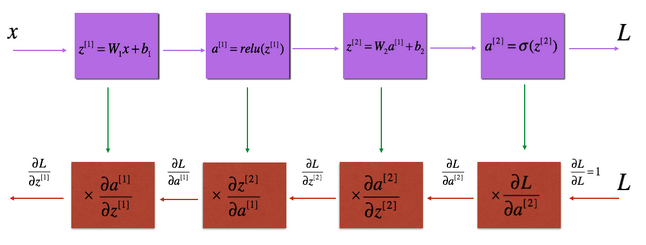
<caption><center> <b>Рисунок 3 </b>: Прямое и обратное распространение для *LINEAR->RELU->LINEAR->SIGMOID* <br> *Фиолетовые блоки - прямое распространение, а красные - обратное распространение.*  </center></caption>


Тут можно использовать цепное правило для получения производной функции потерь $\mathcal{L}$ по $z. ^{[1]}$ В двухслойной сети это выглядит следующим образом:

$$\frac{d \mathcal{L}(a^{[2]},y)}{{dz^{[1]}}} = \frac{d\mathcal{L}(a^{[2]},y)}{{da^{[2]}}}\frac{{da^{[2]}}}{{dz^{[2]}}}\frac{{dz^{[2]}}}{{da^{[1]}}}\frac{{da^{[1]}}}{{dz^{[1]}}} \tag{8} $$

Чтобы вычислить градиент $dW^{[1]} = \frac{\partial L}{\partial W^{[1]}}$, необходимо использовать предыдущую производную и цепное правило, тогда $dW^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial W^{[1]}}$. 

Аналогично, чтобы вычислить градиент $db^{[1]} = \frac{\partial L}{\partial b^{[1]}}$: $db^{[1]} = dz^{[1]} \times \frac{\partial z^{[1]} }{\partial b^{[1]}}$.

Поэтому мы говорим об **обратном распространении**.


Теперь, как и в случае с прямым распространением, необходимо построить обратное распространение в три этапа:
- LINEAR - обратное распространение для линейного слоя.
- LINEAR -> ACTIVATION - обратное распространение для линейного слоя с функцией активации, где в ACTIVATION части вычисляется производная от функции активации ReLU или sigmoid
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID  - обратное распространения для всей модели

### 6.1 - Linear backward

Для слоя $l$ линейная часть равна: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (с последующим применением функции активации).

Предполагая, что вы уже вычислили производную $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. Нужно получить $(dW^{[l]}, db^{[l]} ,dA^{[l-1]})$.

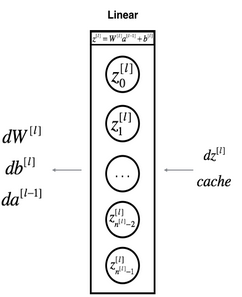
<caption><center> **Figure 4** </center></caption>

Три вывода $(dW^{[l]}, db^{[l]}, dA^{[l]})$ вычисляются, используя входные данные $dZ^{[l]}$.Вот формулы, которые вам нужны:
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$


Три приведенные выше формулы на самом деле очень просты.

Сначала нам нужно знать, что процесс прямого распространения для одного нейрона выглядит следующим образом:

![](http://opn1dyhml.bkt.clouddn.com/17-9-3/86317912.jpg)
$W, A^{[l-1]},b$->$z$->$a=g(z)$->$L$.

Предположим, что $dz^{[l]}$ рассчитан, обозначим его сокращенно $dz$, то есть
$$
\begin{align*}
dz &=\frac{∂L}{∂a} \frac{∂a}{∂z} \\
&= \frac{∂L}{∂z}
\end{align*}
$$

Найдем $dw,db,dA^{[l-1]}$ соответственно ниже:
- $dw = \frac{∂L}{∂a} \frac{∂a}{∂z} \frac{∂z}{∂w}$
     - Мы уже знаем $\frac{∂L}{∂a} \frac{∂a}{∂z}=dz$, единственная цель теперь — найти $\frac{∂z}{∂w}$.
     - И мы знаем $z=wA^{[l-1]}+b$, поэтому можем найти $ \frac{∂z}{∂w}=A^{[l-1]}$
     - Наконец, из формулы **(7)** мы можем узнать, что нужно добавить коэффициент $\frac{1}{m}$
     - Таким образом, мы можем получить $dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{ [ l]} A^{[l-1] T}$

Точно так же легко получить формулы **(9) из $\frac{∂z}{∂b}=1$, $\frac{∂z}{∂A^{[l-1]}} =w$** и **(10)**

**Задание**: Используйте три приведенные выше формулы для реализации linear_backward().

In [38]:
def linear_backward(dZ, cache):
    """
    Реализуйте линейную часть обратного распространения для одного слоя (уровень l)
    
    Аргументы:
    dZ -- Градиент стоимости по отношению к линейному выходу (для слоя l)
    cache -- кортеж значений (A_prev, W, b), поступающих в результате прямого распространения в текущем слое

    Возвращает:
    dA_prev -- Градиент стоимости относительно активации (предыдущего слоя l-1), той же размерности, что и A_prev.
    dW -- Градиент стоимости по отношению к W (текущий слой l), той же размерности, что и W
    db -- Градиент стоимости по отношению к b (текущий слой l), той же размерности, что и b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    ### Начало кода ### (≈ 3 строки)
    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)
    ### Конец кода ###
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [39]:
# Тестовые входные данные
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


**Ожидаемый результат**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]] </td> 
  </tr> 
    <tr>
        <td> **dW** </td>
        <td > [[-0.10076895  1.40685096  1.64992505]] </td> 
    </tr> 
    <tr>
        <td> **db** </td>
        <td> [[ 0.50629448]] </td> 
    </tr>    
</table>



### 6.2 - Linear-Activation backward

Далее требуется создать функцию, которая объединит две вспомогательные функции: **`linear_backward`** и обратное распространенин для активации **`linear_activation_backward`**.

Для реализации «linear_activation_backward» предоставлены две функции:
- **`sigmoid_backward`**: реализует обратное распространение для функции активации SIGMOID. Вызывается следующим образом:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: реализует обратное распространение для функции активации RELU. Вызывается следующим образом:

```python
dZ = relu_backward(dA, activation_cache)
```

Если $g(.)$ - это функция активации, 
`sigmoid_backward` и `relu_backward` вычисляют $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Задание**: Реализуйте обратное распространение ошибки для слоя *LINEAR->ACTIVATION*.

In [44]:
def linear_activation_backward(dA, cache, activation):
    """
    Реализует обратное распространение ошибки для слоя *LINEAR->ACTIVATION*.
    
    Аргументы:
    dA --постактивационный градиент для текущего слоя l 
    cache -- кортеж значений (linear_cache, active_cache), который мы храним для эффективного вычисления обратного распространения
    activation -- активация, которая будет использоваться на этом слое, хранится в виде текстовой строки: "sigmoid" или "relu".
    
    Возвращает:
    dA_prev -- Градиент стоимости относительно активации (предыдущего слоя l-1), той же размерности, что и A_prev.
    dW -- Градиент стоимости по отношению к W (текущий слой l), той же размерности, что и W
    db -- Градиент стоимости по отношению к b (текущий слой l), той же размерности, что и b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### Начало кода ### (≈ 2 строки)
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### Конец кода ###
        
    elif activation == "sigmoid":
        ### Начало кода ### (≈ 2 строки)
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### Конец кода ###
    
    return dA_prev, dW, db

In [48]:
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Ожидаемый результат для sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 
  </tr>  
    <tr>
    <td > dW </td> 
           <td > [[ 0.10266786  0.09778551 -0.01968084]] </td> 
  </tr> 
    <tr>
    <td > db </td> 
           <td > [[-0.05729622]] </td> 
  </tr> 
</table>



**Ожидаемый результат для relu**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td>
  </tr> 
    <tr>
    <td > dW </td> 
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td> 
  </tr>  
    <tr>
    <td > db </td> 
           <td > [[-0.20837892]] </td> 
  </tr> 
</table>



### 6.3 - L-Model Backward 

Теперь требуется реализовать обратную функцию для всей сети. Напомним, что когда при написании функции L_model_forward, на каждой итерации сохранялся кеш, содержащий (X,W,b и z). При обратном распространении надо будет использовать эти переменные для вычисления градиентов. Поэтому в функции `L_model_backward` будем перебирать все скрытые слои назад, начиная со слоя $L$. На каждом этапе будем использовать кэшированные значения слоя $l$ для обратного распространения данных по слою $l$. На рисунке 5 ниже показан обратный проход.


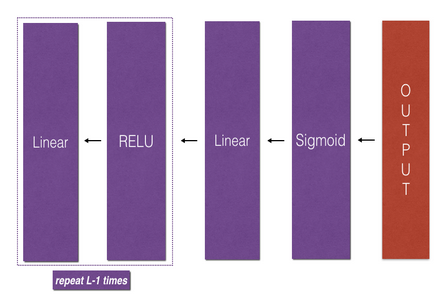
<caption><center>  <b>Figure 5</b> : Обратное распространение  </center></caption>

**Инициализация обратного распространения**:
Чтобы выполнить обратное распространение по сети начнем с конца. Мы знаем, что выходные данные будут следующими:
$A^{[L]} = \sigma(Z^{[L]})$. Таким образом, надо вычислить `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
Для этого используйте эту формулу (углубляться в то, откуда она взялась не будем):
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

Затем используйте этот градиент после вычисления «dAL», чтобы продолжить движение назад. Как видно на рисунке 5, теперь вы можете ввести dAL в реализованную вами обратную функцию LINEAR->SIGMOID (которая будет использовать кэшированные значения, сохраненные функцией L_model_forward). После этого придется использовать цикл for для перебора всех остальных слоев с помощью обратной функции LINEAR->RELU. Каждая переменная dA, dW и db должна храниться в словаре градиентов. Для этого используйте эту формулу: 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

Например, для $l=3$: `grads["dW3"]`.

**Задание**: Реализуйте обратное распространение ошибки для модели *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID*.

In [51]:
def L_model_backward(AL, Y, caches):
    """
   Реализует обратное распространение для всей сети [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID.
    
    Аргументы:
    AL -- вектор вероятностей, вывод прямого распространения (L_model_forward())
    Y -- вектор действительных "label" (содержит 0 если не-кошка, 1 если кошка)
    caches -- список caches, содержащий:
                каждый кеш линейной_активации_forward() с «relu» (это кэши[l], для l в диапазоне (L-1), т.е. l = 0...L-2)
                кеш линейной_активации_forward() с «sigmoid» (это кеши[L-1])
    Возвращает:
    grads -- словарь с градиентами
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # количество слоев
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # после этой строки Y такой же размерности, как и AL
    
    # Инициализация обратного распространения
    ### Начало кода ### (1 строка)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    ### Конец кода ###
    
    # LГрадиенты третьего слоя (SIGMOID -> LINEAR). Входы: «AL, Y, caches». Выходы: "grads["dAL"], grads["dWL"], grads["dbL"]
    ### Начало кода ### (≈ 2 строки)
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    ### Конец кода ###
    
    for l in reversed(range(L-1)):
        # l-й слой: (RELU -> LINEAR) градиенты.
        # Входные данные: "grads["dA" + str(l + 2)], кэши". Выходы: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)]
        ### Начало кода ### (≈ 5 строк)
        current_cache = caches[l]
        # Здесь легко ошибиться в нижнем индексе. Обратите внимание, что первый передаваемый параметр — это dA следующего слоя (если смотреть в направлении прямого распространения).
        grads["dA" + str(l + 1)], grads["dW" + str(l + 1)], grads["db" + str(l + 1)] = linear_activation_backward(grads["dA" + str(l + 2)], current_cache, "relu")
        ### Конец кода ###

    return grads

In [52]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dA1 = "+ str(grads["dA1"]))

dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


**Ожилаемый результат**

<table style="width:60%">
  
  <tr>
    <td > dW1 </td> 
           <td > [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]] </td> 
  </tr> 
    <tr>
    <td > db1 </td> 
           <td > [[-0.22007063]
 [ 0.        ]
 [-0.02835349]] </td> 
  </tr> 
  <tr>
  <td > dA1 </td> 
           <td > [[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]] </td> 
  </tr> 
</table>



### 6.4 - Обновление параметров

В этом разделе обновим параметры модели, используя градиентный спуск:

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

где $\alpha$ — скорость обучения. После вычисления обновленных параметров сохраните их в словаре параметров.

**Задание**: Реализуйте `update_parameters()` для обновления ваших параметров с использованием градиентного спуска.

**Инструкции**:
Обновите параметры, используя градиентный спуск для каждых $W^{[l]}$ и $b^{[l]}$ для $l = 1, 2, ..., L$. 


In [55]:
def update_parameters(parameters, grads, learning_rate):
    """
    Обновите параметры, используя градиентный спуск
    
    Аргументы:
    parameters -- словерь, содержащий ваши параметры 
    grads -- словарь, сожержащий ваши градиенты, вывод L_model_backward
    
    Возвращает:
    parameters -- словарь, содержащий ваши обновленные параметры 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # число слоев в сети

    # Update rule для каждого параметра. Используйте цикл for.
    ### Начало кода ### (≈ 3 строки)
    for l in range(1, L + 1):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]
    ### Конец кода ###
        
    return parameters

In [56]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Ожидаемый результат**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
    <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
    <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>


## 7 — Заключение

Реализованы все функции, необходимые для построения глубокой нейронной сети!

В следующей лабораторной соединим все это вместе, чтобы построить две модели:
- Двухслойная нейронная сеть
- Нейронная сеть L-слоя.
